###connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###load and display the data

In [ ]:
df_seeds = pd.read_csv('/content/drive/MyDrive/seeds(in).csv', header = 0)
summary = df_seeds.info()
display(df_seeds.head(5))
display(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   15.26   209 non-null    float64
 1   14.84   209 non-null    float64
 2   0.871   209 non-null    float64
 3   5.763   209 non-null    float64
 4   3.312   209 non-null    float64
 5   2.221   209 non-null    float64
 6   5.22    209 non-null    float64
 7   1       209 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


None

In [ ]:
# Assign meaningful column names after reading the CSV without a header
df_seeds = pd.read_csv('/content/drive/MyDrive/seeds(in).csv', header=None)
df_seeds.columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']


print(df_seeds.head(5))
print(df_seeds.isna().sum())

    area  perimeter  compactness  length  width  asymmetry  groove  class
0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220      1
1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956      1
2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825      1
3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805      1
4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175      1
area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
class          0
dtype: int64


In [ ]:
#Check for missing data
df_seeds.isna().any().any()

np.False_

In [ ]:
#Install the library
!pip install cool_library

ERROR: Could not find a version that satisfies the requirement cool_library (from versions: none)
ERROR: No matching distribution found for cool_library


In [ ]:

# Target (last column) as its own 1-column DataFrame
target_seeds = df_seeds.iloc[:, -1].to_frame().copy()

# All feature columns (everything except the last)
features_seeds = df_seeds.iloc[:, :-1].copy()

# (optional) quick sanity checks
print(target_seeds.head())
print(features_seeds.head())
print(features_seeds.shape, target_seeds.shape)


   class
0      1
1      1
2      1
3      1
4      1
    area  perimeter  compactness  length  width  asymmetry  groove
0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220
1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956
2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825
3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805
4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175
(210, 7) (210, 1)


In [ ]:
#converting to ndarray for easy processing
X = features_seeds.to_numpy()
y_label = target_seeds.to_numpy()

#subtract -1 from the y_label to make it start from 0
y = y_label - 1

# Use array slicing to display the first 5 elements of the NumPy arrays
print(X[:5])
print(y[:5])

[[15.26   14.84    0.871   5.763   3.312   2.221   5.22  ]
 [14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]
 [14.29   14.09    0.905   5.291   3.337   2.699   4.825 ]
 [13.84   13.94    0.8955  5.324   3.379   2.259   4.805 ]
 [16.14   14.99    0.9034  5.658   3.562   1.355   5.175 ]]
[[0]
 [0]
 [0]
 [0]
 [0]]


###Train, test and validation split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

# Ensure correct dtypes/shapes
X_all = X.astype(np.float32)                 # features (n_samples, 7)
y_all = y.astype(np.int32).ravel()           # labels as 1-D ints starting at 0

# 1) 20% test split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_all, y_all, test_size=0.20, random_state=42, stratify=y_all
)

# 2) From remaining 80%, take 20% for validation (i.e., 16% of total)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.20, random_state=42, stratify=y_train_full
)

# 3) Show shapes
print("X_train:", X_train.shape, " y_train:", y_train.shape)
print("X_valid:", X_valid.shape, " y_valid:", y_valid.shape)
print("X_test :", X_test.shape,  " y_test :", y_test.shape)



X_train: (134, 7)  y_train: (134,)
X_valid: (34, 7)  y_valid: (34,)
X_test : (42, 7)  y_test : (42,)


###Model construction

In [ ]:
# MODEL CONSTRUCTION — 3-class LNN (softmax regression), kernel_regularizer=None

# 1) Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 2) Basic shapes
n_features = X_train.shape[1]   # 7 features for Seeds
n_classes  = 3                  # Kama, Rosa, Canadian
# y must be integer class indices 0..2 (you already did y = y_label - 1)

# 3) Linear Neural Network for multiclass classification:
#    Input(d) → Dense(3, softmax). No weight regularization yet.
softmax_lnn = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(n_classes, activation="softmax", kernel_regularizer=None)
])

# 4) Compile (sparse labels → use sparse_categorical_crossentropy)
softmax_lnn.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# 5) Summary
softmax_lnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)

###Standardization of the data

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Fit on TRAIN only
scaler_seeds = StandardScaler()
X_train_std  = scaler_seeds.fit_transform(X_train)   # learns mean/std from train
X_valid_std  = scaler_seeds.transform(X_valid)       # uses train stats
X_test_std   = scaler_seeds.transform(X_test)        # uses train stats



#Experiment 3 (Baseline softmax regression)
###The goal is to build a multiclass softmax regression (linear neural network) for the Seeds dataset using standardized features. The model is a single linear layer with softmax output, trained with SGD (lr=0.001) for 200 epochs and batch size 64. I train on the training split, validate on the validation split to monitor generalization, then report train/test loss and accuracy. Finally, I produce test predictions and a classification report for per-class metrics.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 364ms/step - accuracy: 0.2845 - loss: 1.3708 - val_accuracy: 0.3235 - val_loss: 1.4136
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.2941 - loss: 1.3517 - val_accuracy: 0.3235 - val_loss: 1.4029
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.2766 - loss: 1.3601 - val_accuracy: 0.3235 - val_loss: 1.3925
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.3059 - loss: 1.3216 - val_accuracy: 0.3235 - val_loss: 1.3822
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2844 - loss: 1.3431 - val_accuracy: 0.3235 - val_loss: 1.3716
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2922 - loss: 1.3093 - val_accuracy: 0.3235 - val_loss: 1.3619
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.2861 - loss: 1.3352 - val_accuracy: 0.3235 - val_loss: 1.3534
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2861 - loss: 1.3149 - val_accuracy: 0.3235 - val_los

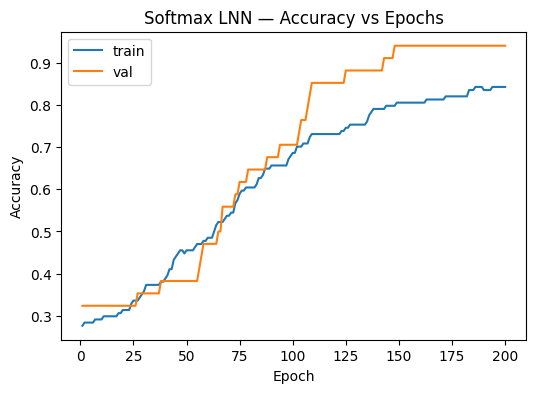

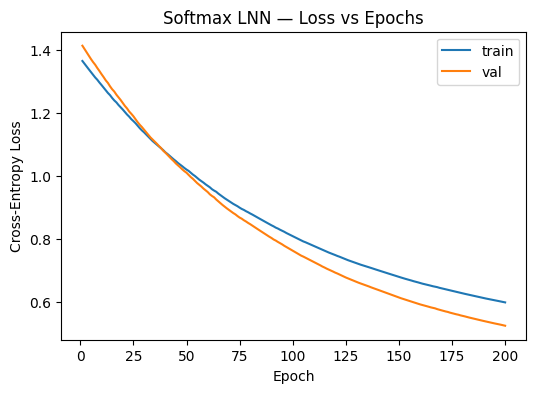

In [ ]:
# Imports

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# number of input features (columns) after standardization; number of classes in Seeds
n_features = X_train_std.shape[1]
n_classes  = 3

# define a linear softmax model: Input(d) with Dense(3, softmax)
softmax_baseline = keras.Sequential([
    layers.Input(shape=(n_features,)),                          # expects a 2D array: (batch, n_features)
    layers.Dense(n_classes, activation="softmax",               # linear logits for softmax probabilities over 3 classes
                 kernel_regularizer=None)                       # no weight regularization in this baseline
])

# compile with SGD optimizer and the right multiclass loss for integer labels (0,1,2)
softmax_baseline.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001),        # fixed learning rate per the prompt
    loss="sparse_categorical_crossentropy",                     # integer class indices (not one-hot)
    metrics=["accuracy"]                                        # track accuracy during training/eval
)

softmax_baseline.summary()                                      # print parameter counts and layer shapes

# fit the model on training data and validate on the validation split to monitor generalization
history_softmax = softmax_baseline.fit(
    X_train_std, y_train,                                       # standardized train features and integer labels
    validation_data=(X_valid_std, y_valid),                     # standardized validation data for val metrics
    epochs=200,                                                 # fixed budget per the prompt
    batch_size=64,                                              # mini-batch size per the prompt
    verbose=1                                                   # show per-epoch progress
)

# evaluate final performance on train and test splits (no leakage; scaler fit on train earlier)
tr_loss, tr_acc = softmax_baseline.evaluate(X_train_std, y_train, verbose=0)
te_loss, te_acc = softmax_baseline.evaluate(X_test_std,  y_test,  verbose=0)
print("\nTrain loss/acc:", (tr_loss, tr_acc))
print("Test  loss/acc:", (te_loss, te_acc))

# get test-set class probabilities and convert to predicted class ids by taking argmax over 3 classes
y_test_prob = softmax_baseline.predict(X_test_std, verbose=0)   # shape: (n_test, 3)
y_test_pred = np.argmax(y_test_prob, axis=1)                    # shape: (n_test,)

# confusion matrix summarizes counts of true vs predicted classes
print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# classification report provides per-class precision/recall/F1 and macro/micro averages
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

# Learning curves (accuracy vs epochs, loss vs epochs)
epochs = range(1, len(history_softmax.history["loss"]) + 1)
# Accuracy plot
plt.figure(figsize=(6,4))
plt.plot(epochs, history_softmax.history["accuracy"], label="train")
plt.plot(epochs, history_softmax.history["val_accuracy"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Softmax LNN — Accuracy vs Epochs")
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(6,4))
plt.plot(epochs, history_softmax.history["loss"], label="train")
plt.plot(epochs, history_softmax.history["val_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Softmax LNN — Loss vs Epochs")
plt.legend()
plt.show()


#Experiment 4 (L2 Regularization)

###This cell trains a multiclass softmax regression LNN with L2 weight regularization on the standardized Seeds data. I fix the training settings (SGD, lr=0.001, 200 epochs, batch size=64) and add an L2 penalty to reduce overfitting. I train on the training split, validate on the validation split, then report train/test accuracy and plot learning curves (accuracy and loss vs. epochs). The standardized inputs were created without leakage by fitting the scaler on the training set only.

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.0858 - loss: 1.8230 - val_accuracy: 0.1765 - val_loss: 2.0491
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0936 - loss: 1.8394 - val_accuracy: 0.1765 - val_loss: 2.0394
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0780 - loss: 1.8307 - val_accuracy: 0.1765 - val_loss: 2.0272
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0819 - loss: 1.8171 - val_accuracy: 0.1765 - val_loss: 2.0158
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0917 - loss: 1.8251 - val_accuracy: 0.1765 - val_loss: 2.0023
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0917 - loss: 1.7700 - val_accuracy: 0.1765 - val_loss: 1.9895
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0838 - loss: 1.7863 - val_accuracy: 0.1765 - val_loss: 1.9785
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0702 - loss: 1.8101 - val_accuracy: 0.1765 - val_loss

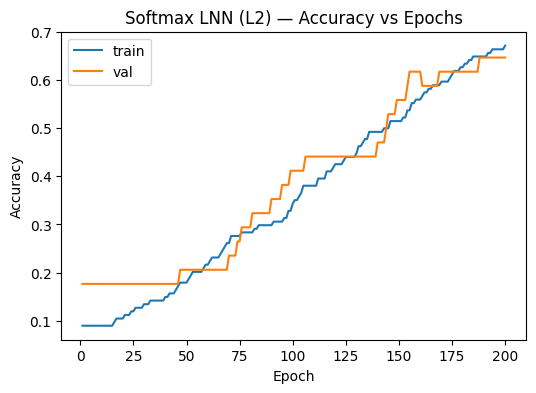

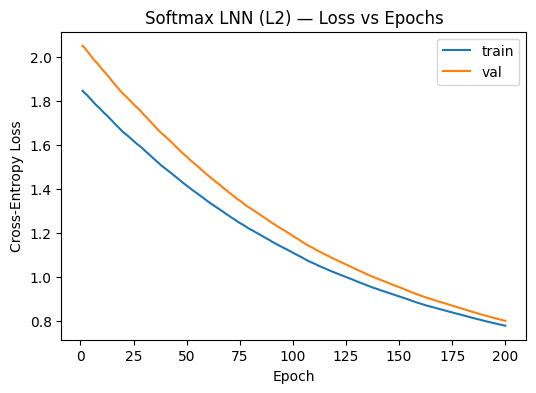

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# 1) Fixed training hyperparameters
lr = 0.001          # optimizer step size
epochs = 200        # total training epochs
batch_size = 64     # mini-batch size
l2_lambda = 1e-5    # L2 penalty strength on weights

# 2) Build a linear softmax classifier: Input(d), Dense(3, softmax) with L2
n_features = X_train_std.shape[1]   # number of input features
n_classes  = 3                      # Seeds has 3 classes
softmax_l2 = keras.Sequential([
    layers.Input(shape=(n_features,)),                     # expects 2D input: (batch, n_features)
    layers.Dense(
        n_classes,                                         # one logit per class
        activation="softmax",                              # convert logits to class probabilities
        kernel_regularizer=regularizers.l2(l2_lambda)      # apply L2 penalty to weight matrix
    )
])

# 3) Compile the model: SGD optimizer and sparse categorical loss (integer labels 0..2)
softmax_l2.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr),      # fixed learning rate
    loss="sparse_categorical_crossentropy",                # labels are integer class indices
    metrics=["accuracy"]                                   # track accuracy during training/eval
)

# 4) Train on training split and monitor validation split
history_l2 = softmax_l2.fit(
    X_train_std, y_train,                                  # standardized train features and labels
    validation_data=(X_valid_std, y_valid),                # standardized validation data
    epochs=epochs,                                         # training budget
    batch_size=batch_size,                                 # batch size
    verbose=1                                              # show per-epoch progress
)

# 5) Report train and test accuracy only (no confusion matrix per instructions)
train_loss, train_acc = softmax_l2.evaluate(X_train_std, y_train, verbose=0)
test_loss,  test_acc  = softmax_l2.evaluate(X_test_std,  y_test,  verbose=0)
print(f"Train accuracy: {train_acc:.4f}")
print(f"Test  accuracy: {test_acc:.4f}")

# 6) Learning curves: accuracy vs epochs and loss vs epochs
ep = range(1, len(history_l2.history["loss"]) + 1)         # epoch index for plotting

plt.figure(figsize=(6,4))
plt.plot(ep, history_l2.history["accuracy"],     label="train")      # training accuracy per epoch
plt.plot(ep, history_l2.history["val_accuracy"], label="val")        # validation accuracy per epoch
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Softmax LNN (L2) — Accuracy vs Epochs")
plt.legend(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(ep, history_l2.history["loss"],     label="train")          # training loss per epoch
plt.plot(ep, history_l2.history["val_loss"], label="val")            # validation loss per epoch
plt.xlabel("Epoch"); plt.ylabel("Cross-Entropy Loss"); plt.title("Softmax LNN (L2) — Loss vs Epochs")
plt.legend(); plt.show()


#Experiment 5 (L1 regularization)
###This cell trains a multiclass softmax regression (LNN) with L1 regularization on the standardized Seeds data. L1 encourages sparse weights (feature selection effect), which can reduce overfitting and highlight informative features. I keep training settings fixed (SGD, lr=0.001, 200 epochs, batch size 64), train on the training split, validate on the validation split, then report train/test accuracy and plot accuracy and loss vs. epochs

Model: "sequential_287"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_287 (Dense)               │ (None, 3)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.0574 - loss: 1.9745 - val_accuracy: 0.0588 - val_loss: 2.0108
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0572 - loss: 1.9423 - val_accuracy: 0.0588 - val_loss: 1.9982
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0552 - loss: 1.9709 - val_accuracy: 0.0588 - val_loss: 1.9869
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0572 - loss: 1.9253 - val_accuracy: 0.0588 - val_loss: 1.9769
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0533 - loss: 1.9289 - val_accuracy: 0.0588 - val_loss: 1.9662
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0572 - loss: 1.9310 - val_accuracy: 0.0588 - val_loss: 1.9532
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0611 - loss: 1.9020 - val_accuracy: 0.0588 - val_loss: 1.9413
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0572 - loss: 1.9004 - val_accuracy: 0.0588 - val_loss

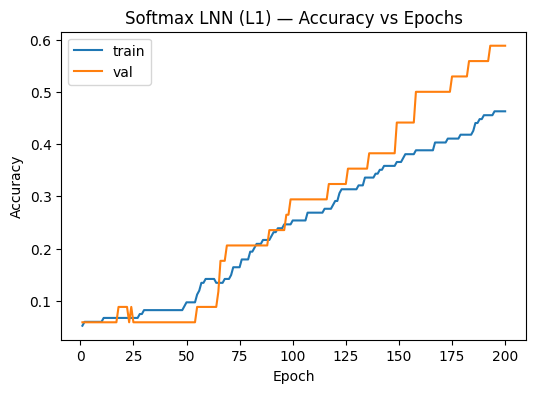

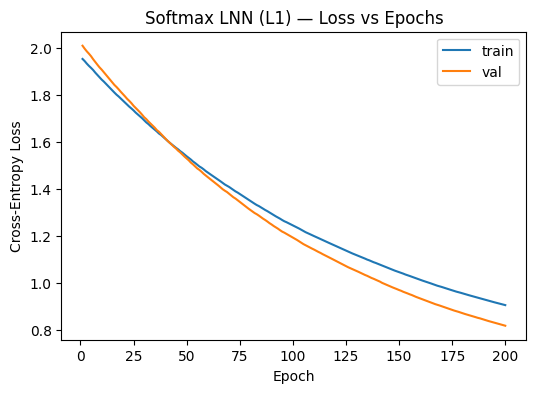

In [ ]:
#import libraries
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

# 1) Fixed training hyperparameters
lr = 0.001          # SGD step size
epochs = 200        # total training epochs
batch_size = 64     # mini-batch size

# 2) L1 penalty strength (try 1e-4..3e-3 if you want to sweep)
l1_lambda = 1e-4

# 3) Build a linear softmax model: Input(d); Dense(3, softmax) with L1 on weights
n_features = X_train_std.shape[1]   # number of input features
n_classes  = 3                      # Seeds has 3 classes
softmax_l1 = keras.Sequential([
    layers.Input(shape=(n_features,)),                 # expects shape (batch, n_features)
    layers.Dense(
        n_classes,                                     # one logit per class
        activation="softmax",                          # convert logits to probabilities
        kernel_regularizer=regularizers.l1(l1_lambda)  # L1 penalty (encourages sparse weights)
    )
])

# 4) Compile with SGD and the correct multiclass loss for integer labels
softmax_l1.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr),  # fixed learning rate
    loss="sparse_categorical_crossentropy",            # integer class indices (0..2)
    metrics=["accuracy"]                               # track accuracy during training/eval
)

softmax_l1.summary()                                   # print model structure and parameter counts

# 5) Train on training split; monitor validation split (no leakage—scaler fit on train earlier)
history_l1 = softmax_l1.fit(
    X_train_std, y_train,
    validation_data=(X_valid_std, y_valid),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# 6) Report train and test accuracy only (per instructions)
train_loss, train_acc = softmax_l1.evaluate(X_train_std, y_train, verbose=0)
test_loss,  test_acc  = softmax_l1.evaluate(X_test_std,  y_test,  verbose=0)
print(f"Train accuracy: {train_acc:.4f}")
print(f"Test  accuracy: {test_acc:.4f}")

# 7) Learning curves: accuracy vs epochs and loss vs epochs
ep = range(1, len(history_l1.history["loss"]) + 1)

plt.figure(figsize=(6,4))
plt.plot(ep, history_l1.history["accuracy"],     label="train")   # training accuracy per epoch
plt.plot(ep, history_l1.history["val_accuracy"], label="val")     # validation accuracy per epoch
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Softmax LNN (L1) — Accuracy vs Epochs")
plt.legend(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(ep, history_l1.history["loss"],     label="train")       # training loss per epoch
plt.plot(ep, history_l1.history["val_loss"], label="val")         # validation loss per epoch
plt.xlabel("Epoch"); plt.ylabel("Cross-Entropy Loss"); plt.title("Softmax LNN (L1) — Loss vs Epochs")
plt.legend(); plt.show()


#Experiment 6 (High Learning rate)

###In this case I trained a softmax regression LNN with an high learning rate (lr=100) to illustrate instability. I add a TerminateOnNaN callback to stop if the optimization diverges. I then print train/test accuracy and plot learning curves to visualize the failure mode.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.5350 - loss: 9.0933 - val_accuracy: 0.9118 - val_loss: 4.9774
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8988 - loss: 2.9226 - val_accuracy: 0.9412 - val_loss: 2.8535
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9197 - loss: 2.0508 - val_accuracy: 0.9118 - val_loss: 1.4984
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9140 - loss: 1.1020 - val_accuracy: 0.9412 - val_loss: 2.5667
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9350 - loss: 0.9563 - val_accuracy: 0.9412 - val_loss: 2.0637
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9678 - loss: 0.5911 - val_accuracy: 0.9412 - val_loss: 1.0654
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9162 - loss: 2.5844 - val_accuracy: 0.9412 - val_loss: 0.5651
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9504 - loss: 0.8751 - val_accuracy: 0.6471 - val_loss

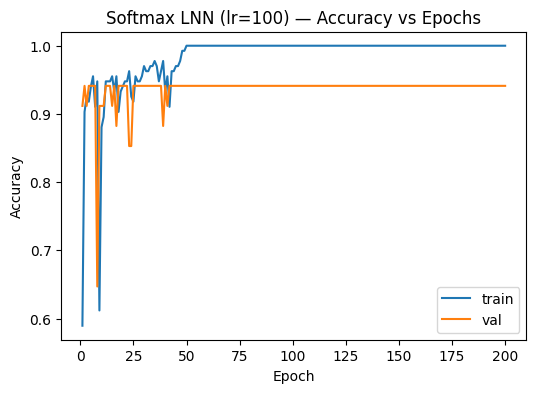

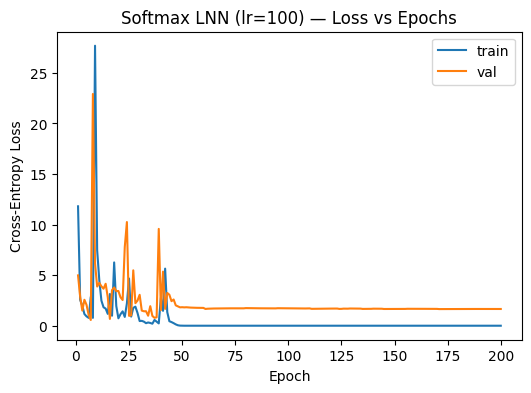

In [ ]:
#Load libraries
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Fixed settings from the prompt
lr = 100.0
epochs = 200
batch_size = 64

# Linear softmax model (no hidden layers, no regularizer)
n_features = X_train_std.shape[1]
n_classes  = 3
softmax_highLR = keras.Sequential([
    layers.Input(shape=(n_features,)),                 # input shape: (batch, n_features)
    layers.Dense(n_classes, activation="softmax")      # single linear layer with softmax output
])

# Compile with SGD at lr=100.0
#    TerminateOnNaN halts training if loss becomes NaN (common with huge LR)
softmax_highLR.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr),
    loss="sparse_categorical_crossentropy",            # integer labels (0..2)
    metrics=["accuracy"]
)
nan_guard = keras.callbacks.TerminateOnNaN()
softmax_highLR.summary()

# Train on train split; validate on validation split to observe instability
history_highLR = softmax_highLR.fit(
    X_train_std, y_train,
    validation_data=(X_valid_std, y_valid),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[nan_guard],                             # stop if divergence produces NaNs
    verbose=1
)

# Report train/test accuracy (no confusion matrix)
train_loss, train_acc = softmax_highLR.evaluate(X_train_std, y_train, verbose=0)
test_loss,  test_acc  = softmax_highLR.evaluate(X_test_std,  y_test,  verbose=0)
print(f"Train accuracy: {train_acc:.4f}")
print(f"Test  accuracy: {test_acc:.4f}")

# Learning curves: accuracy and loss vs. epochs
ep = range(1, len(history_highLR.history.get("loss", [])) + 1)

plt.figure(figsize=(6,4))
plt.plot(ep, history_highLR.history.get("accuracy", []),     label="train")
plt.plot(ep, history_highLR.history.get("val_accuracy", []), label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Softmax LNN (lr=100) — Accuracy vs Epochs")
plt.legend(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(ep, history_highLR.history.get("loss", []),     label="train")
plt.plot(ep, history_highLR.history.get("val_loss", []), label="val")
plt.xlabel("Epoch"); plt.ylabel("Cross-Entropy Loss"); plt.title("Softmax LNN (lr=100) — Loss vs Epochs")
plt.legend(); plt.show()


#Experiment 7
###In this case we performs a manual grid search to find an optimal softmax regression (LNN) on the standardized Seeds data. I sweep learning rate, batch size, epoch cap, and optional L2; for each config I train on the training split and select by validation accuracy (with early stopping to avoid wasted epochs). Then I retrain the best setting on train+valid and report test accuracy, and I plot the learning curves from the best validation run for the report.

Best (by validation accuracy):
{'lr': 0.001, 'batch': 16, 'epochs_cap': 200, 'l2': 0.0003, 'val_acc': 0.9411764740943909}


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)



Final retrained model — Train acc: 0.9048 | Test acc: 0.8571


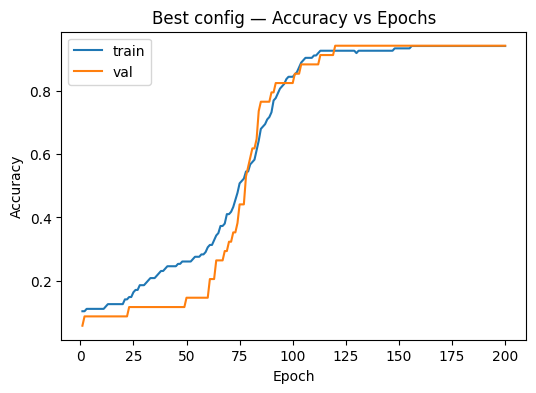

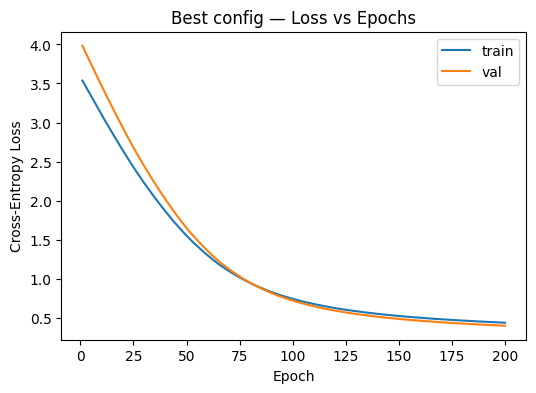


Optimal hyperparameters:
  LR=0.001, Batch=16, Epoch cap=200, Regularizer=L2 (λ=0.0003)
Validation accuracy (search): 0.9412
Test accuracy (retrained):   0.8571


In [ ]:
#Import library
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import accuracy_score

# 1) Search space: compact but covers sensible ranges for standardized linear models
lr_list       = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2]     # log-spaced learning rates
batch_list    = [16, 32, 64, 128]                  # small dataset → moderate batch sizes
epoch_caps    = [100, 200]                         # early stopping will pick best epoch within the cap
l2_list       = [1e-4, 3e-4, 1e-3]           # optionally apply L2; None means no regularizer

n_features = X_train_std.shape[1]
n_classes  = 3

def build_model(lr, l2_lambda):
    """Create and compile a linear softmax model with the given LR and optional L2."""
    reg = None if l2_lambda is None else regularizers.l2(l2_lambda)
    model = keras.Sequential([
        layers.Input(shape=(n_features,)),                      # input shape: (batch, n_features)
        layers.Dense(n_classes, activation="softmax",           # linear layer + softmax over 3 classes
                     kernel_regularizer=reg)
    ])
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr),
                  loss="sparse_categorical_crossentropy",       # integer labels (0..2)
                  metrics=["accuracy"])
    return model

best = {"val_acc": -1}   # running record of the best validation accuracy and its config

# 2) Grid search loop: train on TRAIN, select by VALIDATION accuracy (no test peeking)
for lr in lr_list:
    for bs in batch_list:
        for max_ep in epoch_caps:
            for l2lam in l2_list:
                model = build_model(lr, l2lam)
                # Early stopping to stop at the best epoch; restores best weights
                es = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10,
                                                   restore_best_weights=True, verbose=0)
                hist = model.fit(X_train_std, y_train,
                                 validation_data=(X_valid_std, y_valid),
                                 epochs=max_ep, batch_size=bs, verbose=0,
                                 callbacks=[es])
                # last recorded val_accuracy corresponds to the restored best epoch
                val_acc = hist.history["val_accuracy"][-1]
                if val_acc > best["val_acc"]:
                    best.update({
                        "val_acc": val_acc,
                        "lr": lr, "batch": bs, "epochs_cap": max_ep, "l2": l2lam,
                        "history": hist, "model": model
                    })

print("Best (by validation accuracy):")
print({k: best[k] for k in ["lr","batch","epochs_cap","l2","val_acc"]})

# 3) Retrain best setting on TRAIN+VALID, then evaluate once on TEST (final unbiased estimate)
X_train_all = np.vstack([X_train_std, X_valid_std])            # stack rows: more samples, same features
y_train_all = np.concatenate([y_train, y_valid])               # concatenate 1-D label vectors

final_model = build_model(best["lr"], best["l2"])
es_final = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10,
                                         restore_best_weights=True, verbose=0)
# Use all dev data for training; no validation split here (we already chose hyperparams)
final_hist = final_model.fit(X_train_all, y_train_all,
                             validation_split=0.0,
                             epochs=best["epochs_cap"], batch_size=best["batch"], verbose=0,
                             callbacks=[es_final])

# Compute train (dev) and test accuracy
train_acc = accuracy_score(y_train_all, np.argmax(final_model.predict(X_train_all, verbose=0), axis=1))
test_acc  = accuracy_score(y_test,      np.argmax(final_model.predict(X_test_std,  verbose=0), axis=1))
print(f"\nFinal retrained model — Train acc: {train_acc:.4f} | Test acc: {test_acc:.4f}")

# 4) Learning curves for the winning validation run (for the report)
epochs_seen = range(1, len(best["history"].history["loss"])+1)
plt.figure(figsize=(6,4))
plt.plot(epochs_seen, best["history"].history["accuracy"],     label="train")
plt.plot(epochs_seen, best["history"].history["val_accuracy"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Best config — Accuracy vs Epochs")
plt.legend(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs_seen, best["history"].history["loss"],     label="train")
plt.plot(epochs_seen, best["history"].history["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Cross-Entropy Loss"); plt.title("Best config — Loss vs Epochs")
plt.legend(); plt.show()

# 5) Tidy summary for your notebook
reg_text = "None" if best["l2"] is None else f"L2 (λ={best['l2']})"
print(f"\nOptimal hyperparameters:\n  LR={best['lr']}, Batch={best['batch']}, Epoch cap={best['epochs_cap']}, Regularizer={reg_text}")
print(f"Validation accuracy (search): {best['val_acc']:.4f}")
print(f"Test accuracy (retrained):   {test_acc:.4f}")


#Experiment 8
##This cell tunes an optimal k-NN classifier for the Seeds dataset using the standardized features. I combine the training and validation splits into a single development set for a stronger cross-validated search, then run a GridSearchCV over k (neighbors), p (distance metric), and weights. I use Stratified 5-fold CV and select by CV accuracy. The best model (refit automatically) is finally evaluated once on the held-out test set. I also print the test confusion matrix and classification report

In [ ]:
# Importing Libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) Build a single "development" set for tuning: stack rows (same columns), no leakage
X_dev = np.vstack([X_train_std, X_valid_std])   # combine train+valid features along the sample axis
y_dev = np.concatenate([y_train, y_valid])      # combine labels as a 1-D vector

# 2) Define base k-NN model and the hyperparameter grid to search
knn = KNeighborsClassifier()
param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9, 11, 15, 21, 31, 41],  # k values spanning small to moderate
    "weights": ["uniform", "distance"],                  # unweighted vs distance-weighted votes
    "p": [1, 2]                                          # p=1 (Manhattan), p=2 (Euclidean)
}

# 3) Stratified 5-fold CV preserves class balance in each fold; shuffle for robustness
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4) Grid search: evaluate all combos with CV accuracy; refit=True retrains on all X_dev
knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,       # use all cores
    refit=True       # after CV, retrain the best model on the full X_dev, y_dev
)

# Run the hyperparameter search on the development set (train+valid)
knn_cv.fit(X_dev, y_dev)

# Extract the best estimator and CV result summary
best_knn = knn_cv.best_estimator_
print("Best hyperparameters:", knn_cv.best_params_)
print("Mean CV accuracy   :", f"{knn_cv.best_score_:.4f}")

# 5) Final evaluation: predict on the held-out standardized test set
y_test_pred = best_knn.predict(X_test_std)
test_acc = accuracy_score(y_test, y_test_pred)
print("\nTest accuracy:", f"{test_acc:.4f}")

# Optional diagnostic outputs for the report
print("\nConfusion matrix (test):\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification report (test):\n", classification_report(y_test, y_test_pred, digits=4))


Best hyperparameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Mean CV accuracy   : 0.9348

Test accuracy: 0.8571

Confusion matrix (test):
 [[ 8  3  3]
 [ 0 14  0]
 [ 0  0 14]]

Classification report (test):
               precision    recall  f1-score   support

           0     1.0000    0.5714    0.7273        14
           1     0.8235    1.0000    0.9032        14
           2     0.8235    1.0000    0.9032        14

    accuracy                         0.8571        42
   macro avg     0.8824    0.8571    0.8446        42
weighted avg     0.8824    0.8571    0.8446        42

